In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv('train.csv', index_col=0)

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
sex_to_num = lambda x: int(x == 'female')

In [139]:
train_data['Sex'] = train_data['Sex'].apply(sex_to_num)

In [189]:
sex_group = train_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].groupby('Sex')
for sg in sex_group.groups:
    class_group = sex_group.get_group(sg).groupby('Pclass')
    print(class_group.corr())

                      Age      Fare  Sex  Survived
Pclass                                            
1      Age       1.000000 -0.203992  NaN -0.270566
       Fare     -0.203992  1.000000  NaN  0.073361
       Sex            NaN       NaN  NaN       NaN
       Survived -0.270566  0.073361  NaN  1.000000
2      Age       1.000000 -0.196554  NaN -0.422569
       Fare     -0.196554  1.000000  NaN  0.039381
       Sex            NaN       NaN  NaN       NaN
       Survived -0.422569  0.039381  NaN  1.000000
3      Age       1.000000 -0.333007  NaN -0.146657
       Fare     -0.333007  1.000000  NaN  0.099016
       Sex            NaN       NaN  NaN       NaN
       Survived -0.146657  0.099016  NaN  1.000000
                      Age      Fare  Sex  Survived
Pclass                                            
1      Age       1.000000 -0.138710  NaN  0.126440
       Fare     -0.138710  1.000000  NaN -0.011008
       Sex            NaN       NaN  NaN       NaN
       Survived  0.126440 -0.01

In [193]:
train_X = np.array((2,3))
train_X

array([2, 3])

In [174]:
class_group = train_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].groupby('Pclass')
for group in range(1,4):
    print(class_group.get_group(group).corr())

          Survived  Pclass       Sex       Age      Fare
Survived  1.000000     NaN  0.615212 -0.267964  0.190966
Pclass         NaN     NaN       NaN       NaN       NaN
Sex       0.615212     NaN  1.000000 -0.225052  0.246625
Age      -0.267964     NaN -0.225052  1.000000 -0.218611
Fare      0.190966     NaN  0.246625 -0.218611  1.000000
          Survived  Pclass       Sex       Age      Fare
Survived  1.000000     NaN  0.753121 -0.273507  0.098628
Pclass         NaN     NaN       NaN       NaN       NaN
Sex       0.753121     NaN  1.000000 -0.071507  0.081997
Age      -0.273507     NaN -0.071507  1.000000 -0.197038
Fare      0.098628     NaN  0.081997 -0.197038  1.000000
          Survived  Pclass       Sex       Age      Fare
Survived  1.000000     NaN  0.387313 -0.202102  0.000930
Pclass         NaN     NaN       NaN       NaN       NaN
Sex       0.387313     NaN  1.000000 -0.172537  0.133768
Age      -0.202102     NaN -0.172537  1.000000 -0.260315
Fare      0.000930     NaN  0.1

In [90]:
train_data[['Survived', 'Sex', 'Parch', 'Age', 'Fare']][(train_data['Sex'] == 1) & (train_data['Parch'] > 0)].corr()

,Survived,Sex,Parch,Age,Fare
Survived,1.000000,NaN,-0.291214,0.083023,0.204466
Sex,NaN,NaN,NaN,NaN,NaN
Parch,-0.291214,NaN,1.000000,0.167131,-0.024816
Age,0.083023,NaN,0.167131,1.000000,0.225529
Fare,0.204466,NaN,-0.024816,0.225529,1.000000


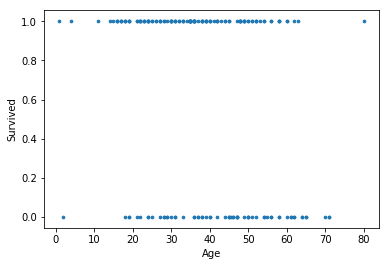

In [104]:
train_data[train_data.Pclass == 1].plot.scatter('Age', 'Survived', s=7)

In [140]:
X_male = train_data[['Sex', 'Fare']]
y = train_data['Survived']

In [52]:
X.head()

,Pclass,Sex,Fare,Parch
PassengerId,,,,
1,3,0,7.2500,0
2,1,1,71.2833,0
3,3,1,7.9250,0
4,1,1,53.1000,0
5,3,0,8.0500,0


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

X.isnull().sum().sum()

0

In [54]:
k_range = list(range(1,15))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance']}


In [55]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [56]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [57]:
print(grid.best_score_)
print(grid.best_params_)

0.7991021324354658
{'n_neighbors': 5, 'weights': 'distance'}


In [59]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [148]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.76666667  0.73333333  0.75280899  0.7752809   0.8988764   0.80898876
  0.82022472  0.83146067  0.82022472  0.79545455]
0.800331971399


In [152]:
test_data = pd.read_csv('test.csv', index_col=0)
test_data['Sex'] = test_data['Sex'].apply(sex_to_num)
test_data['Age'].isnull().sum()

86

In [143]:
test_X = test_data[['Sex', 'Fare']]
test_X.head()

,Sex,Fare
PassengerId,,
892,0,7.8292
893,1,7.0000
894,0,9.6875
895,0,8.6625
896,1,12.2875


In [145]:
test_X = test_X.fillna(0)

In [146]:
test_X.isnull().sum().sum()

0

In [149]:
##test_y = knn.predict(test_X)
test_y = logreg.predict(test_X)
test_X.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [118]:
test_y_log = logreg.predict(X)

from sklearn import metrics

print(metrics.accuracy_score(y, test_y_log))

0.785634118967


In [150]:
df_y = pd.DataFrame({'Survived':test_y}, index=test_X.index)
df_y.to_csv('submission.csv')